In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import re
import os
import glob

In [2]:
# define the base path for the datasets
base_path = 'drugs reac age group/dulaglutide'

# define the file pattern to match the datasets
file_pattern = os.path.join(base_path, 'dulaglutide_reac_demo_*.csv')

# get the list of file paths sorted by year
file_paths = sorted(glob.glob(file_pattern), key=lambda x: int(os.path.basename(x).split('_')[-1].split('.')[0]))

# load the datasets into a list of dataframes
datasets = [pd.read_csv(file_path) for file_path in file_paths]

print(f"Loaded {len(datasets)} datasets")
print(f"First dataset sample: \n{datasets[0].head()}")

Loaded 11 datasets
First dataset sample: 
Empty DataFrame
Columns: [primaryid, caseid, drug_seq, role_cod, drugname, val_vbm, route, dose_vbm, cum_dose_chr, cum_dose_unit, dechal, rechal, lot_num, exp_dt, nda_num, dose_amt, dose_unit, dose_form, dose_freq, year_x, quarter_x, pt, year_y, quarter_y, caseversion, i_f_code, event_dt, mfr_dt, init_fda_dt, fda_dt, rept_cod, mfr_num, mfr_sndr, age, age_cod, gndr_cod, e_sub, wt, wt_cod, rept_dt, to_mfr, occp_cod, reporter_country, occr_country, year, quarter, age_group]
Index: []

[0 rows x 47 columns]


In [6]:
combined_df = pd.concat(datasets)

/var/folders/ld/dl450hd568j5wxpfd5d84y340000gn/T/ipykernel_16954/2609166978.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat(datasets)


In [7]:
stop_words = set(stopwords.words('english'))

# Preprocessing function for text data
def preprocess_text(text):
    if not isinstance(text, str):  # If the input is not a string, replace with an empty string or 'unknown'
        return ''
    # Convert text to lowercase
    text = text.lower()
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text


In [8]:
combined_df['preprocessed_pt'] = combined_df['pt'].apply(preprocess_text)
combined_df.dropna(subset=['pt'], inplace=True)

print(f"Preprocessed reactions sample:\n{combined_df['preprocessed_pt'].head()}")

Preprocessed reactions sample:
0                              nausea
1                            vomiting
2                            vomiting
3                          eructation
4    gastrooesophageal reflux disease
Name: preprocessed_pt, dtype: object


In [9]:
reaction_texts = combined_df['preprocessed_pt'].tolist()

In [11]:
from bertopic import BERTopic

dulaglutide_topic_model = BERTopic()
topics, probs = dulaglutide_topic_model.fit_transform(reaction_texts)

In [12]:
dulaglutide_topic_model.get_topic_info()

Topic  Count                                               Name  \
0       -1    125               -1_heart_function_rupture_meningitis   
1        0    135                            0_nausea_drunk_feeling_   
2        1    133                         1_diarrhoea_haemorrhagic__   
3        2    120              2_interaction_drug_eruption_epistaxis   
4        3    119               3_dyspnoea_presyncope_rest_dysphonia   
..     ...    ...                                                ...   
191    190     11  190_cystitis_pneumonitis_pneumatosis_intestinalis   
192    191     11    191_shock_cardiogenic_haemorrhagic_anaphylactic   
193    192     11                        192_dental_caries_tooth_jaw   
194    193     11                        193_eructation_flatulence__   
195    194     11                   194_planus_lichen_fungal_candida   

                                        Representation  \
0    [heart, function, rupture, meningitis, orophar...   
1               [nausea, drunk, feeling, , , , , , , ]   
2            [diarrhoea, haemorrhagic, , , , , , , , ]   
3    [interaction, drug, eruption, epistaxis, toxic...   
4    [dyspnoea, presyncope, rest, dysphonia, , , , ...   
..                                                 ...   
191  [cystitis, pneumonitis, pneumatosis, intestina...   
192  [shock, cardiogenic, haemorrhagic, anaphylacti...   
193  [dental, caries, tooth, jaw, oral, disorder, l...   
194           [eructation, flatulence, , , , , , , , ]   
195  [planus, lichen, fungal, candida, genital, inf...   

                                   Representative_Docs  
0     [tendon rupture, tendon rupture, tendon rupture]  
1                             [nausea, nausea, nausea]  
2                    [diarrhoea, diarrhoea, diarrhoea]  
3    [drug interaction, drug interaction, drug inte...  
4                       [dyspnoea, dyspnoea, dyspnoea]  
..                                                 ...  
191                     [cystitis, cystitis, cystitis]  
192                              [shock, shock, shock]  
193      [dental caries, dental caries, dental caries]  
194               [eructation, eructation, eructation]  
195      [lichen planus, lichen planus, lichen planus]  

[196 rows x 5 columns]

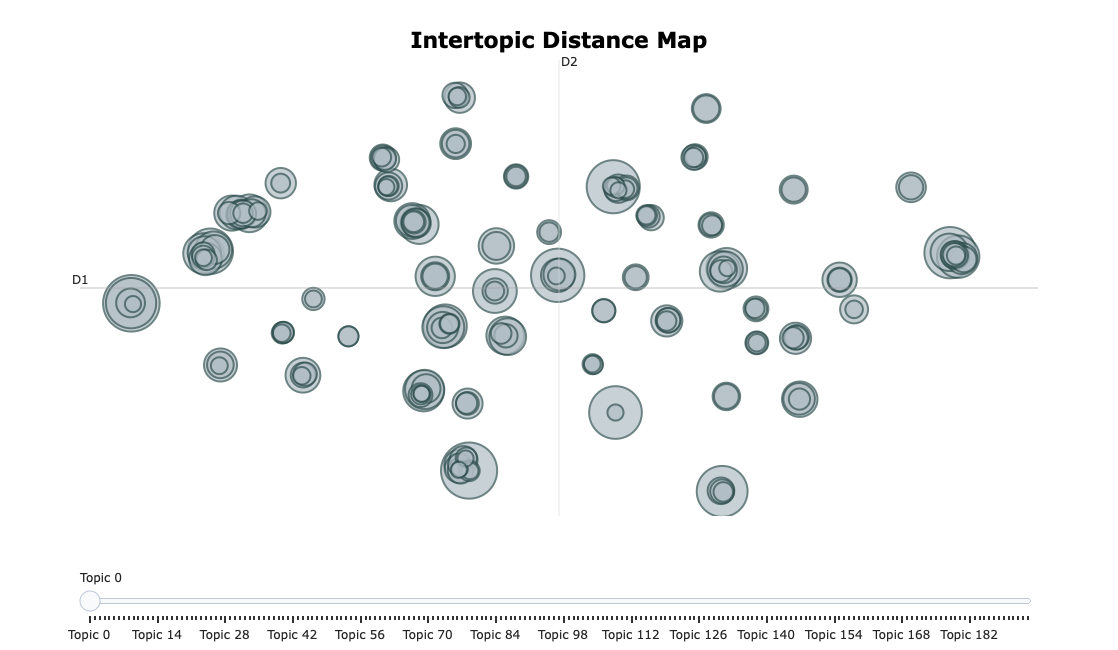

In [13]:
dulaglutide_topic_model.visualize_topics()

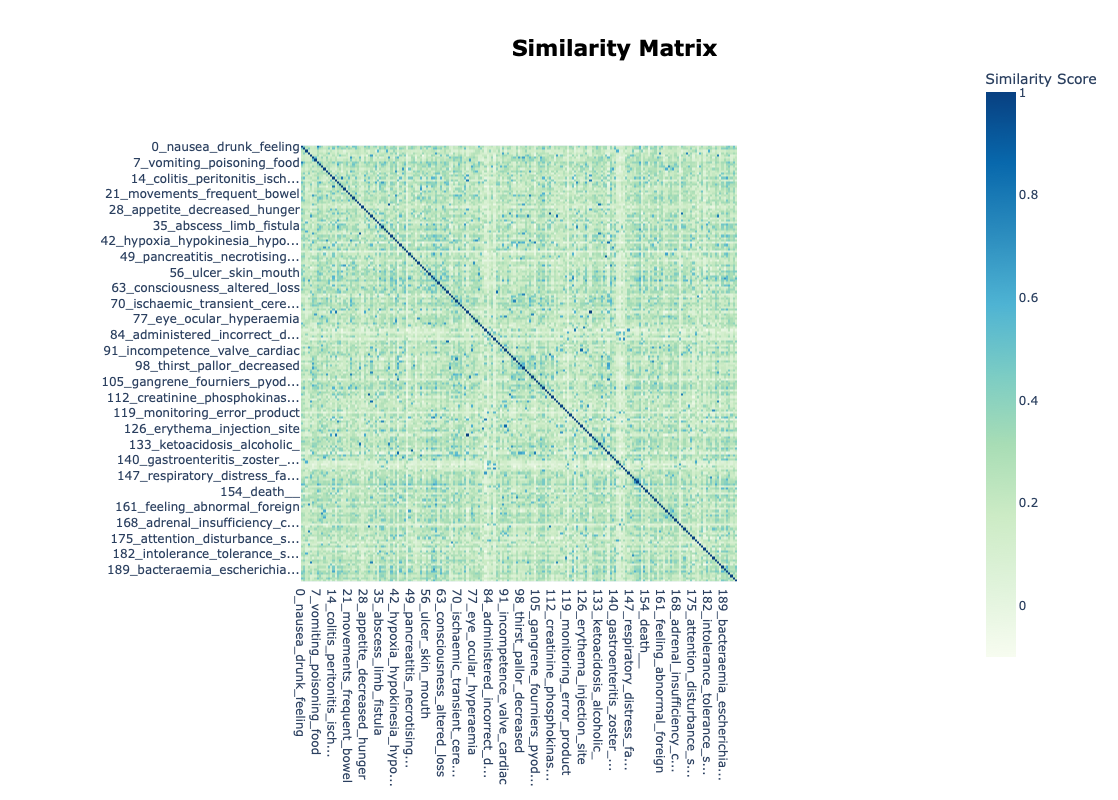

In [14]:
dulaglutide_topic_model.visualize_heatmap()